# Data Analyst Technical Challenge (Statistical Focus)

### Import necessary libraries

In [2]:
import os

import pandas as pd
from sqlalchemy import create_engine

import seaborn as sns
import matplotlib.pyplot as plt

### Define paths

In [3]:
current_path = os.getcwd()
data_folder = os.path.join(current_path, 'data')
device_path = os.path.join(data_folder, 'DeviceProperty.csv')
production_path = os.path.join(data_folder, 'ProductionMetric.csv')
quality_path = os.path.join(data_folder, 'Quality.csv')

### ETL
Load the data from data folder as dataframe.

In [4]:
device_df = pd.read_csv(device_path)
production_df = pd.read_csv(production_path)
quality_df = pd.read_csv(quality_path)

Define database configuration and create a SQL engine

In [5]:
database_config = {
        'username': 'postgres',
        'password': '17110303Cx',
        'host': 'localhost',
        'port':'5432',
        'database':'BeerBo',
        'schema': 'public'  
        }

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
            database_config['username'],
            database_config['password'],
            database_config['host'],
            database_config['port'],
            database_config['database'],
        ))

Load the data into the SQL server

In [6]:
device_df.to_sql('DeviceProperty', engine, index=False, if_exists='replace')
production_df.to_sql('ProductionMetric', engine, index=False, if_exists='replace')
quality_df.to_sql('Quality', engine, index=False, if_exists='replace')

170

## EDA
Let's take a quick look at the first 5 rows of the datasets.

In [7]:
device_df.head()

,deviceKey,Area,DefaultCycleTime,Enterprise,Line,Location,Operation,Plant,SubType,Type
0,Line1,Assembly-2,50,ManuCorp,AssemblyMain,Building G,Advanced Assembly,NorthPlant,HighSpeed,Production-Premium
1,Line2,Fab-Pro,75,ManuCorp,WeldingPrimary,Building C-2,Laser Welding,SouthPlant,Precision,Production-Laser
2,Line3,Paint-Auto,100,ManuCorp,PaintingMain,Building D-2,Electrostatic Paint,WestPlant,E-Coat,Production-Finish
3,Line4,Smart-Logistics,20,ManuCorp,MaterialFlow,Building J,AGV Transfer,WestPlant,Automated,Smart-Logistics


In [8]:
production_df.head()

,prodmetric_stream_key,deviceKey,start_time,end_time,good_count,reject_count,ideal_time,run_time,unplanned_stop_time,planned_stop_time,unplanned_stop_time.1,performance_impact_display_name,process_state_display_name,process_state_reason_display_name,job_display_name,part_display_name,shift_display_name,team_display_name
0,5552062,Line3,2025-01-29 19:10:14.3284760 -06:00,2025-01-29 19:13:19.6285480 -06:00,0,0,0.000000,0.000000,185.300072,0.0,185.300072,Unplanned Stop,Down,Security Alarm,Part D-4000,Part D,Second Shift,Team 2
1,5552060,Line3,2025-01-29 19:05:37.3369440 -06:00,2025-01-29 19:10:14.3284760 -06:00,96,0,157.363822,276.991532,0.000000,0.0,0.000000,Run,Running,Running Normally,Part D-4000,Part D,Second Shift,Team 2
2,5552046,Line4,2025-01-29 19:00:00.0000000 -06:00,2025-01-29 19:02:07.0000000 -06:00,54,0,0.000000,0.000000,0.000000,0.0,0.000000,Not Scheduled,Meal/Break,Lunch,Part J-4000,Part J,Second Shift,Team 3
3,5552048,Line2,2025-01-29 19:00:00.0000000 -06:00,2025-01-29 19:01:34.0000000 -06:00,0,0,0.000000,0.000000,0.000000,0.0,0.000000,Not Scheduled,Meal/Break,Lunch,Part M-3000,Part M,Second Shift,Team 3
4,5552049,Line1,2025-01-29 19:00:00.0000000 -06:00,2025-01-29 19:01:52.0000000 -06:00,67,0,0.000000,0.000000,0.000000,0.0,0.000000,Not Scheduled,Meal/Break,Lunch,Part P-2000,Part P,Second Shift,Team 2


In [9]:
quality_df.head()

,quality_stream_key,deviceKey,count,reject_reason_display_name,prodmetric_stream_key
0,1771948,Line 4,6,Detected by Max WIP,5468380
1,1772152,Line 4,11,Reject,5468383
2,1772153,Line 4,9,Detected by Max WIP,5468383
3,1772154,Line 4,11,Detected by Max WIP,5468386
4,1772155,Line 4,9,Reject,5468386


In [10]:
print(device_df.info())
print(production_df.info())
print(quality_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   deviceKey         4 non-null      object
 1   Area              4 non-null      object
 2   DefaultCycleTime  4 non-null      int64 
 3   Enterprise        4 non-null      object
 4   Line              4 non-null      object
 5   Location          4 non-null      object
 6   Operation         4 non-null      object
 7   Plant             4 non-null      object
 8   SubType           4 non-null      object
 9   Type              4 non-null      object
dtypes: int64(1), object(9)
memory usage: 452.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   prodmetric_stream_key              10000 non-n

## Downtime Analysis

In [ ]:
query = """
    SELECT 
        pm."deviceKey", 
	    pm."unplanned_stop_time",
	    pm."planned_stop_time"
    FROM public."ProductionMetric" pm
"""

downtime_df = pd.read_sql(query, con=engine)
downtime_df.head()

,deviceKey,unplanned_stop_time,planned_stop_time
0,Line3,185.300072,0.0
1,Line3,0.000000,0.0
2,Line4,0.000000,0.0
3,Line2,0.000000,0.0
4,Line1,0.000000,0.0


In [12]:
total_unplanned = downtime_df['unplanned_stop_time'].sum()
total_planned = downtime_df['planned_stop_time'].sum()
total = total_unplanned + total_planned

prop_unplanned = total_unplanned / total
prop_planned = total_planned / total
print(f'The overall proportion of unplanned stop time is: {prop_unplanned*100:.2f}%')
print(f'The overall proportion of planned stop time is: {prop_planned*100:.2f}%')

The overall proportion of unplanned stop time is: 75.99%
The overall proportion of planned stop time is: 24.01%


In [13]:
# Use groupby to get the summary stats of downtime per production line
dt_summary_df = downtime_df.groupby('deviceKey').agg({
    'unplanned_stop_time': ['mean', 'median', 'std', 'min', 'max'],
    'planned_stop_time': ['mean', 'median', 'std', 'min', 'max']
})
# Flatten multi-index
dt_summary_df.columns = ['_'.join(col) for col in dt_summary_df.columns]
dt_summary_df.reset_index(inplace=True)
dt_summary_df

,deviceKey,unplanned_stop_time_mean,unplanned_stop_time_median,unplanned_stop_time_std,unplanned_stop_time_min,unplanned_stop_time_max,planned_stop_time_mean,planned_stop_time_median,planned_stop_time_std,planned_stop_time_min,planned_stop_time_max
0,Line1,51.576421,0.0,89.929091,0.0,640.208119,16.732938,0.0,79.987160,0.0,951.0
1,Line2,49.172053,0.0,84.251790,0.0,809.164892,15.078125,0.0,74.095999,0.0,709.0
2,Line3,41.300305,0.0,78.060467,0.0,439.728239,13.842797,0.0,67.710112,0.0,612.0
3,Line4,49.006807,0.0,81.677030,0.0,468.443734,14.394469,0.0,70.585941,0.0,630.0


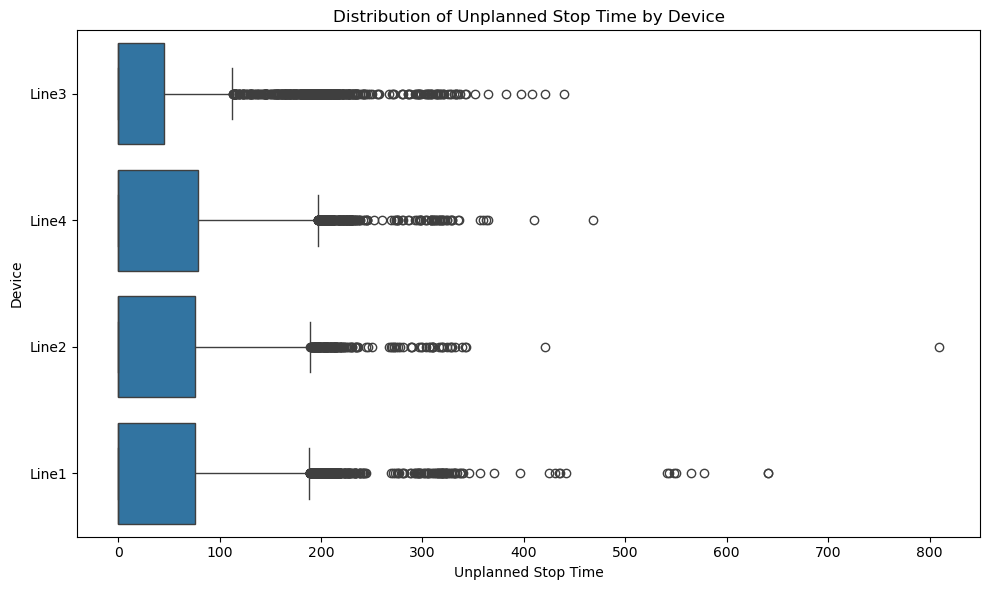

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='deviceKey', x='unplanned_stop_time', data = downtime_df)
plt.title('Distribution of Unplanned Stop Time by Device')
plt.xlabel('Unplanned Stop Time')
plt.ylabel('Device')
plt.tight_layout()
plt.show()

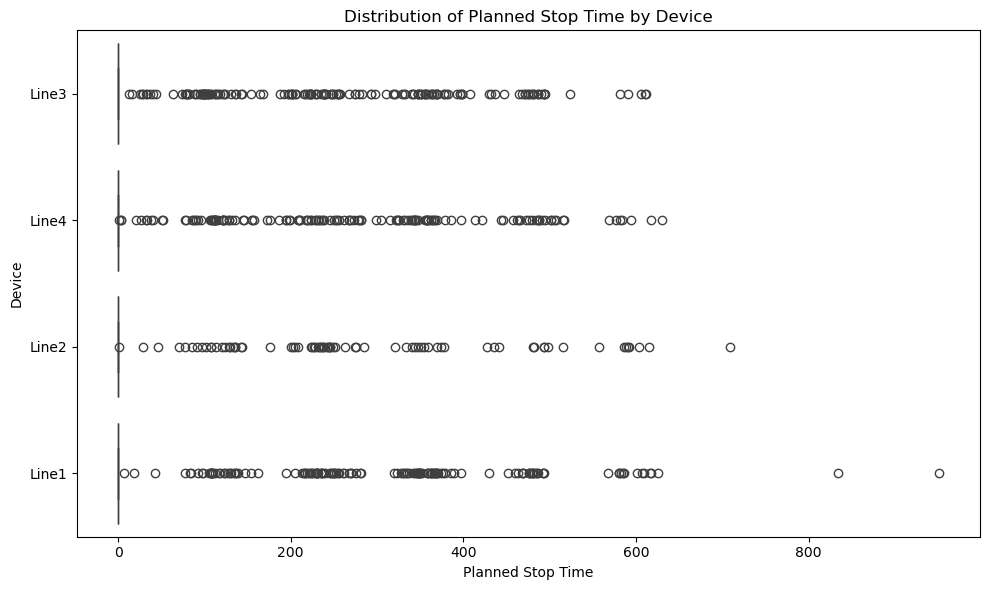

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='deviceKey', x='planned_stop_time', data = downtime_df)
plt.title('Distribution of Planned Stop Time by Device')
plt.xlabel('Planned Stop Time')
plt.ylabel('Device')
plt.tight_layout()
plt.show()

In [16]:
query = """
SELECT pm."process_state_reason_display_name", 
       COUNT(*) AS num_occurrences,
       SUM(pm."unplanned_stop_time") AS total_unplanned_time
FROM public."ProductionMetric" pm
WHERE pm."unplanned_stop_time" > 0
GROUP BY pm."process_state_reason_display_name"
ORDER BY "total_unplanned_time" DESC;
"""

reason_df = pd.read_sql(query, con=engine)

In [17]:
reason_df

,process_state_reason_display_name,num_occurrences,total_unplanned_time
0,Main B Bus Undervolt,418,62982.695112
1,Electrical Fault,414,57034.450261
2,Jam,335,48106.362336
3,Adjustment,291,43895.393584
4,Broken Conveyor,278,40948.108571
5,No Bottles,197,28859.781314
6,Security Alarm,182,27782.819743
7,Missing Reason,180,26170.191916
8,Breakdown,171,25540.865162
9,No Material,175,25021.248353


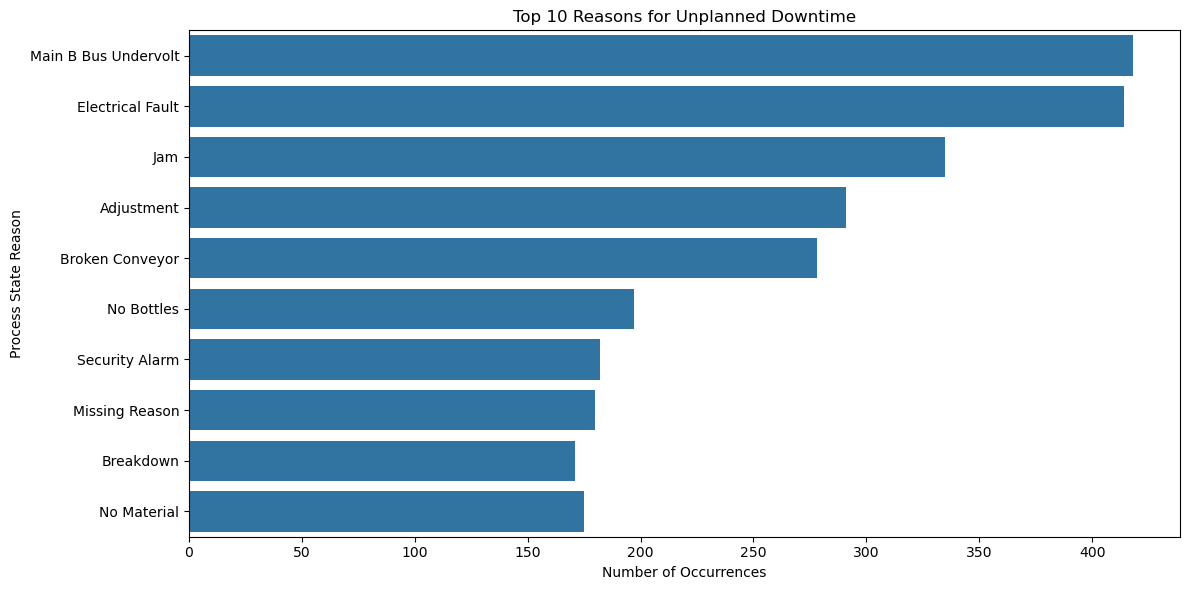

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x='num_occurrences',
    y='process_state_reason_display_name',
    data=reason_df.head(10)
)
plt.xlabel('Number of Occurrences')
plt.ylabel('Process State Reason')
plt.title('Top 10 Reasons for Unplanned Downtime')
plt.tight_layout()
plt.show()

## Production & Quality Analysis
Calculate the overall reject rate (total reject_count / total good_count + reject_count). Note: You may need to aggregate counts from ProductionMetric and potentially link Quality data.

In [19]:
query = """
    SELECT 
        pm."prodmetric_stream_key", 
        pm."deviceKey",
        pm."start_time",
        pm."end_time",
	    pm."good_count",
	    pm."reject_count",
        pm."unplanned_stop_time",
        q."reject_reason_display_name"
    FROM public."ProductionMetric" pm
    LEFT JOIN public."Quality" q
    ON pm.prodmetric_stream_key = q."prodmetric_stream_key"
"""

prod_quality_df = pd.read_sql(query, con=engine)

In [20]:
reject_rate = prod_quality_df['reject_count'].sum()/(prod_quality_df['reject_count'].sum()+prod_quality_df['good_count'].sum())

print(f"The overall reject rate is: {reject_rate*100:.2f}%")

The overall reject rate is: 4.20%


Identify the most common reject_reason_display_name from the Quality table. Visualize the frequency distribution.

In [21]:
reject_reason_df = prod_quality_df.groupby('reject_reason_display_name').size().reset_index(name='count')
reject_reason_df = reject_reason_df.sort_values('count', ascending=False)

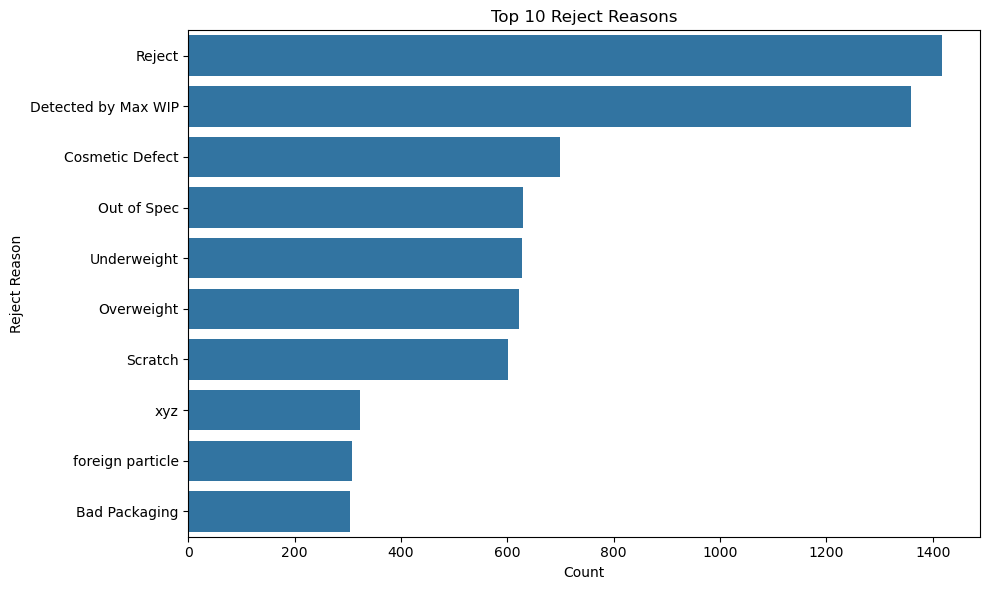

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='count',
    y='reject_reason_display_name',
    data=reject_reason_df.head(10)
)
plt.title('Top 10 Reject Reasons')
plt.xlabel('Count')
plt.ylabel('Reject Reason')
plt.tight_layout()
plt.show()

Compare the average good_count per hour of run_time across different deviceKeys. Are there noticeable differences?

In [27]:
# Convert the `start_time` and `end_time` to datetime object
prod_quality_df['start_time'] = pd.to_datetime(prod_quality_df['start_time'])
prod_quality_df['end_time'] = pd.to_datetime(prod_quality_df['end_time'], errors='coerce', infer_datetime_format=True)

prod_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13513 entries, 0 to 13512
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype                    
---  ------                      --------------  -----                    
 0   prodmetric_stream_key       13513 non-null  int64                    
 1   deviceKey                   13513 non-null  object                   
 2   start_time                  13513 non-null  datetime64[ns, UTC-06:00]
 3   end_time                    13512 non-null  datetime64[ns, UTC-06:00]
 4   good_count                  13513 non-null  int64                    
 5   reject_count                13513 non-null  int64                    
 6   unplanned_stop_time         13513 non-null  float64                  
 7   reject_reason_display_name  7170 non-null   object                   
dtypes: datetime64[ns, UTC-06:00](2), float64(1), int64(3), object(2)
memory usage: 844.7+ KB


/var/folders/h7/yhgz44k17k5855ztc_9j04xh0000gp/T/ipykernel_53044/1528679237.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  prod_quality_df['end_time'] = pd.to_datetime(prod_quality_df['end_time'], errors='coerce', infer_datetime_format=True)


In [28]:
# Now compute duration in hours
prod_quality_df['run_time_hours'] = prod_quality_df['end_time'] - prod_quality_df['start_time']
prod_quality_df['run_time_hours'] = prod_quality_df['run_time_hours'].dt.total_seconds() / 3600
# Calculate good_count_per_hour
prod_quality_df['avg_good_count_per_hour'] = prod_quality_df['good_count'] / prod_quality_df['run_time_hours']

# Group by deviceKey and compute average
avg_good_cnt = prod_quality_df.groupby('deviceKey')['avg_good_count_per_hour'].mean().reset_index()

In [29]:
avg_good_cnt

,deviceKey,avg_good_count_per_hour
0,Line1,1150.001746
1,Line2,1094.410501
2,Line3,944.072069
3,Line4,933.982512


Explore potential relationships: Is there a correlation between `unplanned_stop_time` and `reject_count` for production periods where both occurred? Visualize this relationship (e.g., scatter plot).

In [ ]:
from scipy.stats import pearsonr, spearmanr

pearson_corr, _ = pearsonr(prod_quality_df['unplanned_stop_time'], prod_quality_df['reject_count'])
spearman_corr, _ = spearmanr(prod_quality_df['unplanned_stop_time'], prod_quality_df['reject_count'])

print(f"Pearson Correlation: {pearson_corr:.2f}")
print(f"Spearman Correlation: {spearman_corr:.2f}")

<Axes: xlabel='unplanned_stop_time', ylabel='reject_count'>

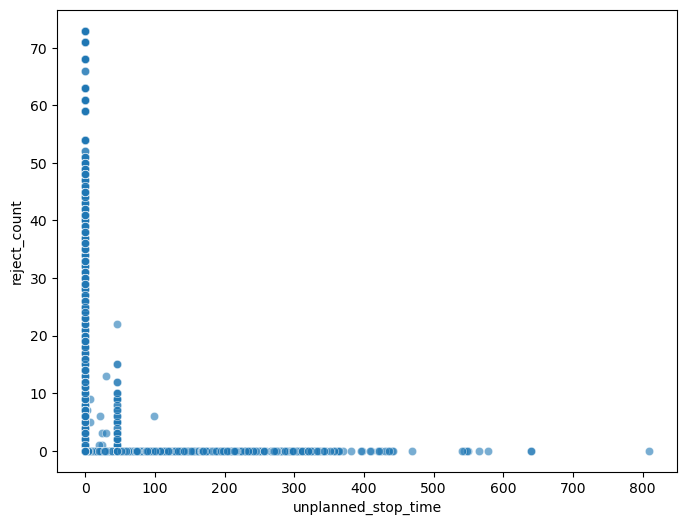

In [ ]:

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='unplanned_stop_time',
    y='reject_count',
    data=prod_quality_df,
    alpha=0.6
)


Judging by the correlation coefficient, `unplanned_stop_time` and `reject_count` have moderately weak linear relationship. However, after plotting the scatterplot, it is clear that `unplanned_stop_time` and `reject_count` have a pretty strong relationship, but it is not linear.
- When there is `unplanned_stop_time`(> 0), there is little to no reject counts. 

## Performance Comparison
Compare key metrics (e.g., average downtime per shift, average reject rate per shift) across different shift_display_name or team_display_name. Visualize these comparisons.

#### Average downtime per shift

In [33]:
query = """
    SELECT 
        pm."shift_display_name",
	    avg(pm."unplanned_stop_time")+avg(pm."planned_stop_time") as average_downtime_per_shift
    FROM public."ProductionMetric" pm
    GROUP BY pm."shift_display_name"
"""

avg_downtime_per_shift_df = pd.read_sql(query, con=engine)
avg_downtime_per_shift_df

,shift_display_name,average_downtime_per_shift
0,Third Shift,62.846622
1,No Shift,0.000000
2,Unknown Shift,0.000000
3,First Shift,63.439933
4,Second Shift,61.869972


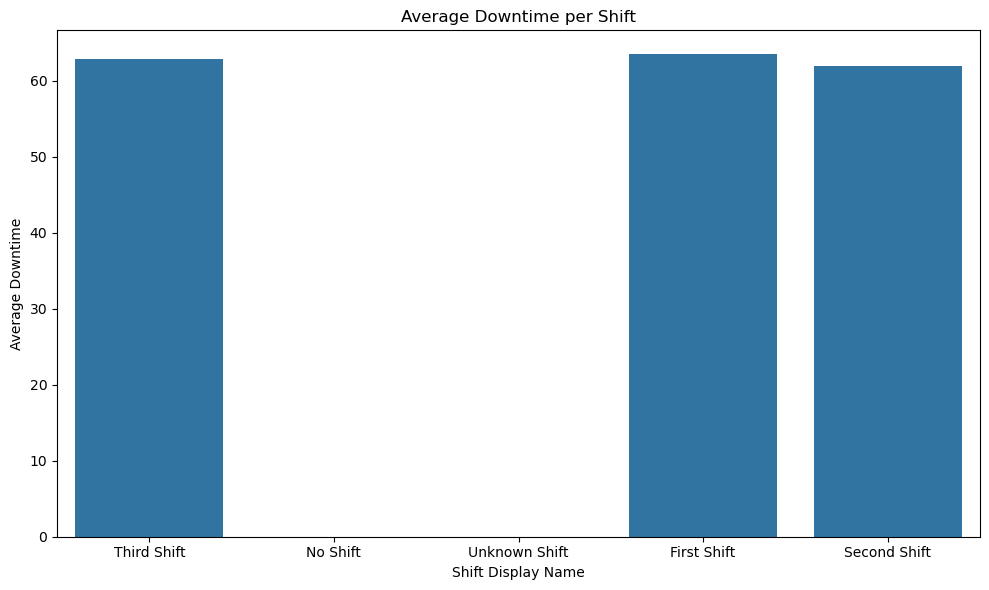

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='shift_display_name',
    y='average_downtime_per_shift',
    data=avg_downtime_per_shift_df
)
plt.title('Average Downtime per Shift')
plt.xlabel('Shift Display Name')
plt.ylabel('Average Downtime')
plt.tight_layout()
plt.show()

#### Average reject rate per shift

In [40]:
query = """
    SELECT 
        pm."shift_display_name",
	    AVG(COALESCE(pm."reject_count"::FLOAT / NULLIF(pm."reject_count" + pm."good_count", 0), 0)) as average_reject_rate_per_shift
    FROM public."ProductionMetric" pm
    GROUP BY pm."shift_display_name"
"""

avg_reject_rate_per_shift_df = pd.read_sql(query, con=engine)
avg_reject_rate_per_shift_df

,shift_display_name,average_reject_rate_per_shift
0,Third Shift,0.029481
1,No Shift,0.000000
2,Unknown Shift,0.000000
3,First Shift,0.031207
4,Second Shift,0.023656


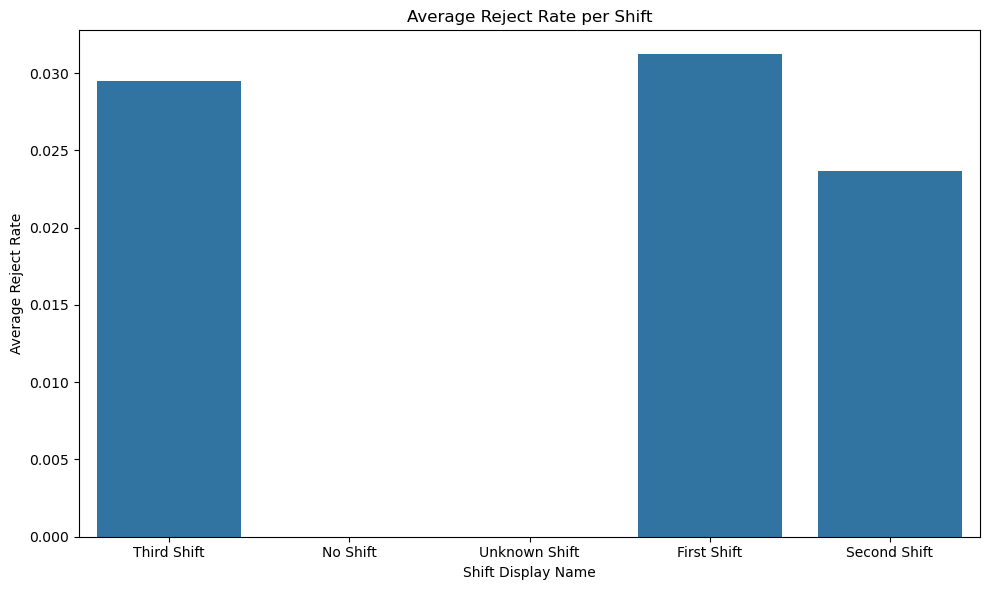

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='shift_display_name',
    y='average_reject_rate_per_shift',
    data=avg_reject_rate_per_shift_df
)
plt.title('Average Reject Rate per Shift')
plt.xlabel('Shift Display Name')
plt.ylabel('Average Reject Rate')
plt.tight_layout()
plt.show()

#### Average downtime per team


In [44]:
query = """
    SELECT 
        pm."team_display_name",
	    avg(pm."unplanned_stop_time")+avg(pm."planned_stop_time") as average_downtime_per_team
    FROM public."ProductionMetric" pm
    GROUP BY pm."team_display_name"
"""

avg_downtime_per_team_df = pd.read_sql(query, con=engine)
avg_downtime_per_team_df

,team_display_name,average_downtime_per_team
0,No Team,18.382748
1,Team 1,63.864218
2,Team 3,63.507045
3,Unknown Team,21.231776
4,Team 2,63.893500


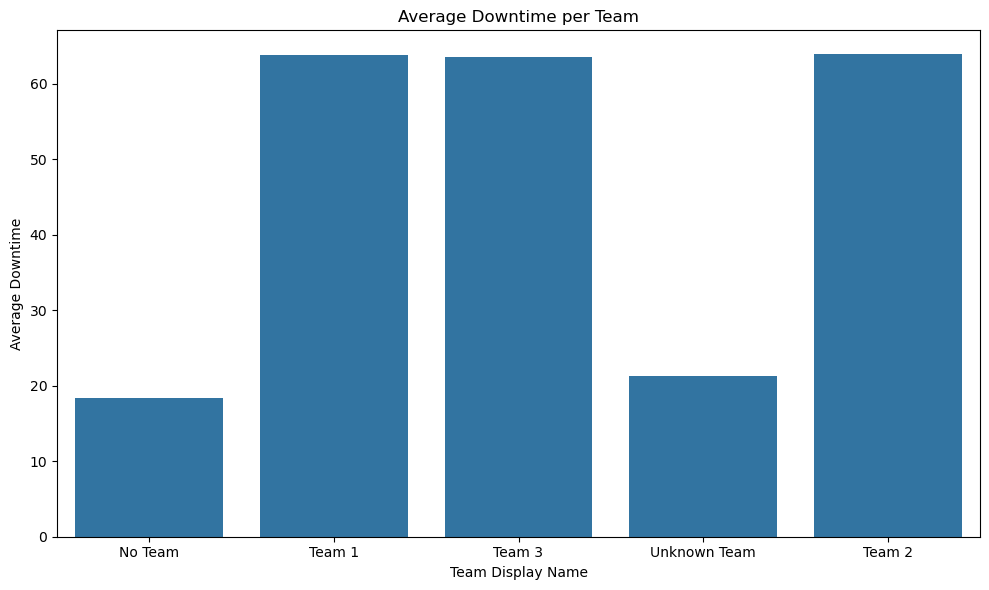

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='team_display_name',
    y='average_downtime_per_team',
    data=avg_downtime_per_shift_df
)
plt.title('Average Downtime per Team')
plt.xlabel('Team Display Name')
plt.ylabel('Average Downtime')
plt.tight_layout()
plt.show()

#### Average Reject Rate per Team

In [47]:
query = """
    SELECT 
        pm."team_display_name",
	    AVG(COALESCE(pm."reject_count"::FLOAT / NULLIF(pm."reject_count" + pm."good_count", 0), 0)) as average_reject_rate_per_team
    FROM public."ProductionMetric" pm
    GROUP BY pm."team_display_name"
"""

avg_reject_rate_per_team_df = pd.read_sql(query, con=engine)
avg_reject_rate_per_team_df

,team_display_name,average_reject_rate_per_team
0,No Team,0.001074
1,Team 1,0.029823
2,Team 3,0.026240
3,Unknown Team,0.000000
4,Team 2,0.030324


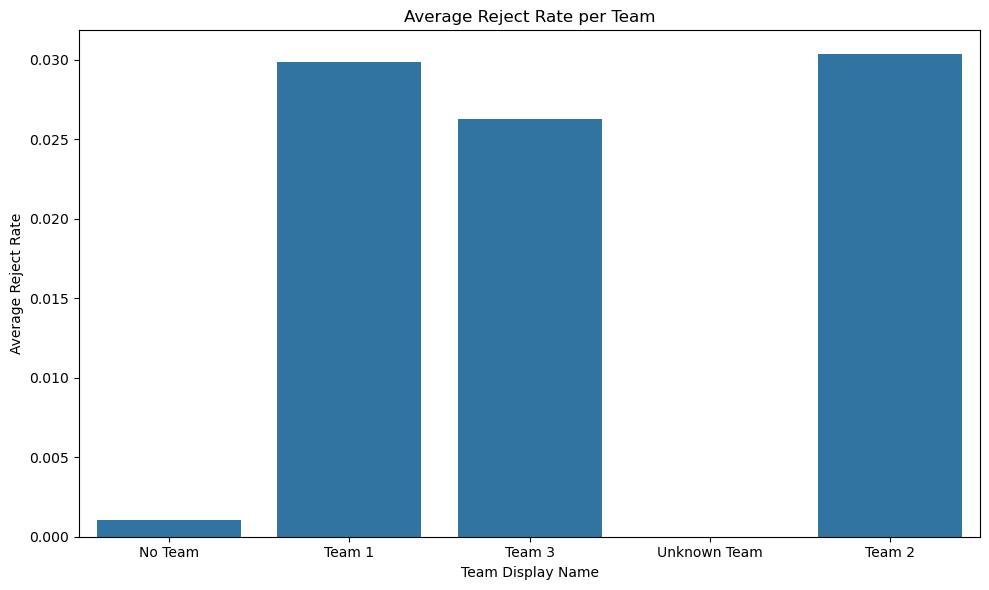

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='team_display_name',
    y='average_reject_rate_per_team',
    data=avg_reject_rate_per_team_df
)
plt.title('Average Reject Rate per Team')
plt.xlabel('Team Display Name')
plt.ylabel('Average Reject Rate')
plt.tight_layout()
plt.show()